In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse.linalg 
import scipy
import pandas as pd
import copy
import seaborn as sns
import pickle
from scipy import sparse
from ECI import *

# 矩阵法计算ECI

# example

--|steel|oil|chip|bean|clothes
--|--|--|--|--|--
USA|1|1|1|1|0
China|1|0|0|1|1
Viet Nam|0|0|0|1|1

In [75]:
# 实际例子
product_name = ["steel","oil","chip","bean","clothes"]
country_name = ["USA","China","Viet Nam"]
X = ['USA', 'USA', 'USA', 'USA', 'China', 'China', 'China', 'Viet Nam', 'Viet Nam']
Y = ['steel', 'oil', 'chip', 'bean', 'steel', 'bean', 'clothes', 'bean', 'clothes']

In [22]:
L_x=[ 'USA', 'China','Viet Nam']
L_y = ["steel","oil","chip","bean","clothes"]

In [74]:
#L_x = list(set(X))
#L_y = list(set(Y))
x2id = dict(zip(L_x,range(len(L_x))))
y2id = dict(zip(L_y,range(len(L_y))))
x = [x2id[xi] for xi in X]
y = [y2id[yi] for yi in Y]
data = [1]*len(x)
m,n = len(x2id),len(y2id)
M = sparse.csc_matrix((data,(x,y)),shape=(m,n))

In [24]:
M = sparse.csc_matrix((data,(x,y)),shape=(m,n))
M = np.matrix(M.toarray())
eci,pci = Get_eci_pci(M)
eci = Get_z_score(eci)
pci = Get_z_score(pci)
print(L_x)
print(eci)
print('='*50)
print(L_y)
print(pci)

==Time 0.00==
['USA', 'China', 'Viet Nam']
[ 1.37652932 -0.40741722 -0.96911209]
['steel', 'oil', 'chip', 'bean', 'clothes']
[-0.0316507   1.08360666  1.08360666 -0.63750372 -1.4980589 ]


In [76]:
d = M.sum(1).T.tolist()[0]
u = M.sum(0).tolist()[0]

In [77]:
nd,nu = len(d),len(u)
D1 = scipy.sparse.csc_matrix(([1.0/i if i>0 else 0. for i in d], (range(nd), range(nd))),shape=(nd,nd))
U1 = scipy.sparse.csc_matrix(([1.0/i if i>0 else 0. for i in u], (range(nu), range(nu))),shape=(nu,nu))
M = sparse.csc_matrix(M)
mcp1 = D1 * M

In [95]:
mcp1 = D1 * M
mcp1.toarray()

array([[0.25      , 0.25      , 0.25      , 0.25      , 0.        ],
       [0.33333333, 0.        , 0.        , 0.33333333, 0.33333333],
       [0.        , 0.        , 0.        , 0.5       , 0.5       ]])

In [79]:
mcp2 = M * U1
mcp2.toarray().T

array([[0.5       , 0.5       , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333],
       [0.        , 0.5       , 0.5       ]])

In [97]:
Mpp = mcp2.T @ mcp1
Mpp.toarray()

array([[0.29166667, 0.125     , 0.125     , 0.29166667, 0.16666667],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.        ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.        ],
       [0.19444444, 0.08333333, 0.08333333, 0.36111111, 0.27777778],
       [0.16666667, 0.        , 0.        , 0.41666667, 0.41666667]])

In [99]:
eigvals, eigvecs = scipy.sparse.linalg.eigs(Mpp, k=3)

In [100]:
eigvals, eigvecs 

(array([1.        +0.j, 0.07766595+0.j, 0.49177849+0.j]),
 array([[ 0.4472136 +0.j,  0.82181977+0.j, -0.11954259+0.j],
        [ 0.4472136 +0.j, -0.35981534+0.j, -0.59571444+0.j],
        [ 0.4472136 +0.j, -0.35981534+0.j, -0.59571444+0.j],
        [ 0.4472136 +0.j, -0.2139707 +0.j,  0.13913327+0.j],
        [ 0.4472136 +0.j, -0.14104838+0.j,  0.50655712+0.j]]))

In [102]:
eig_index2 = eigvals.argsort()[-2]
kp2 = eigvecs[:, eig_index2]

In [105]:
kp2

array([-0.11954259+0.j, -0.59571444+0.j, -0.59571444+0.j,  0.13913327+0.j,
        0.50655712+0.j])

In [103]:
kc2 = mcp1 @ kp2

In [104]:
kc2

array([-0.29295955+0.j,  0.1753826 +0.j,  0.3228452 +0.j])

In [106]:
s2 = np.sign(np.corrcoef(M.sum(1).reshape(-1), kc2.reshape(-1))[0, 1])

In [108]:
eci2 = s2 * kc2
pci2 = s2 * kp2

In [109]:
eci2

array([ 0.29295955-0.j, -0.1753826 +0.j, -0.3228452 +0.j])

In [110]:
pci2

array([ 0.11954259-0.j,  0.59571444-0.j,  0.59571444-0.j, -0.13913327+0.j,
       -0.50655712+0.j])

# 稀疏矩阵方法

In [6]:
data = [1]*len(x)
m,n = len(x2id),len(y2id)
M = sparse.csc_matrix((data,(x,y)),shape=(m,n))
eci,pci,eci3,pci3 = Get_eci_pci_sparse(M)
eci = Get_z_score(eci)
pci = Get_z_score(pci)
print(L_x)
print(eci)
print('='*50)
print(L_y)
print(pci)

==Time 0.00==
['Viet Nam', 'USA', 'China']
[-0.96911209  1.37652932 -0.40741722]
['steel', 'chip', 'oil', 'bean', 'clothes']
[-0.0316507   1.08360666  1.08360666 -0.63750372 -1.4980589 ]


# 利用 ecomplexity 计算


In [6]:
#构建原始数据
from ecomplexity import ecomplexity
from ecomplexity import proximity
# Calculate complexity
trade_cols = {'time':'year', 'loc':'name', 'prod':'skill', 'val':'value'}
Name=[]
Skill=[]
time=[]
value=[]

time=[2019]*len(x)    
value=[1.]*len(x)   
SData=pd.DataFrame({"year":time,'name':x,"skill":y,"value":value})
cdata = ecomplexity(SData, trade_cols,presence_test="manual")#不使用过滤函数

2019


In [7]:
cdata

,name,skill,value,year,diversity,ubiquity,mcp,eci,pci,density,coi,cog
0,0,0,1.0,2019,3.0,3.0,1.0,-0.407417,-0.269341,0.777778,0.998667,0.000000
1,0,1,0.0,2019,3.0,1.0,0.0,-0.407417,2.529743,0.294118,0.998667,1.601729
2,0,2,1.0,2019,3.0,2.0,1.0,-0.407417,0.715973,0.684211,0.998667,0.000000
3,0,3,1.0,2019,3.0,2.0,1.0,-0.407417,-1.668883,1.000000,0.998667,0.000000
4,0,4,0.0,2019,3.0,1.0,0.0,-0.407417,2.529743,0.294118,0.998667,1.601729
5,1,0,1.0,2019,4.0,3.0,1.0,1.376529,-0.269341,0.777778,-1.366512,-0.000000
6,1,1,1.0,2019,4.0,1.0,1.0,1.376529,2.529743,1.000000,-1.366512,0.000000
7,1,2,1.0,2019,4.0,2.0,1.0,1.376529,0.715973,0.842105,-1.366512,-0.000000
8,1,3,0.0,2019,4.0,2.0,0.0,1.376529,-1.668883,0.538462,-1.366512,-0.890543
9,1,4,1.0,2019,4.0,1.0,1.0,1.376529,2.529743,1.000000,-1.366512,0.000000


Text(0.5, 0, 'SPARSE MATRIX')

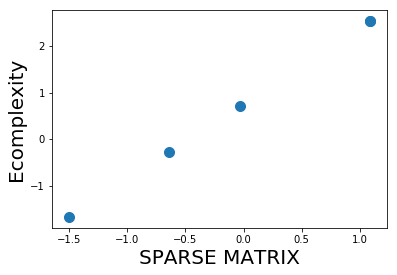

In [13]:
plt.scatter(pci,cdata.pci[:5].tolist(),s=100)
plt.ylabel("Ecomplexity",fontsize=20)
plt.xlabel("SPARSE MATRIX",fontsize=20)

# check 完成
利用稀疏矩阵计算出来的eci与ecomplexity计算得到的eci完全一致
pci部分值不相同，但排序结果一致